# Logistic Regression 逻辑回归

逻辑回归（Logistic Regression），又叫逻辑斯蒂回归，是机器学习中一种十分基础的分类方法，由于算法简单而高效，在实际场景中得到了广泛的应用。本次实验中，我们将探索逻辑回归的原理及算法实现，并使用 scikit-learn 构建逻辑回归分类预测模型。

知识点
线性可分和不可分
Sigmoid 分布函数
逻辑回归模型
对数损失函数
梯度下降法

线性可分和不可分
首先，我们需要先接触一个概念，那就是线性可分。如下图所示，二维平面内，如果只使用一条直接就可以将样本分开，则称为线性可分，否则为线性不可分。
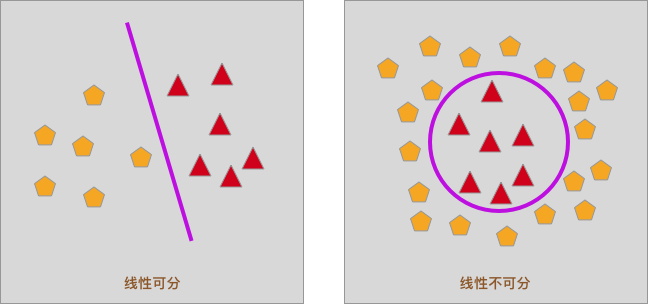


## 激活函数 sigmoid 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

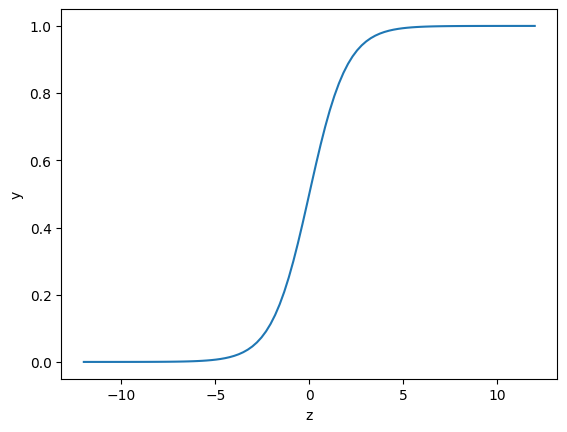

In [2]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid
    
z = np.linspace(-12, 12, 100)  # 生成等间距 x 值方便绘图
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("y")

## 神经网络的加权本质是点积

使用
    ( ) -行向量
     <> -列向量

#### 法则1：“w参数的数目 等于 前一层神经元数目/输入数”
 (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> = 输出数字

#### 法则2：“w参数的组数 等于 后一层神经元的数目/输出数”
或者说是 前者小于等于后者 

@1  (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> = y1 

@2  (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> = y2 

.... 

@m  (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> = ym 

#### 法则3：“bias 偏置数 等于 偏置的组数 等于 后一层神经元的数目/输出数”
或者说是 前者小于等于后者 

@1  (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> + bias_1 = y1 

@2  (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> + bias_2 = y2 

.... 

@m  (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> + bias_n = ym 

#### 法则4：“层之间的激活函数 等于 偏置的组数 等于 后一层神经元的数目/输出数”
或者说是 前者小于等于后者 

@1  activate_fun[ (w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> + bias_1 ]= y1 

@2  activate_fun[(w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> + bias_2 ]= y2 

.... 

@m  activate_fun[(w1 ,w2 ,w3 , ..., wn)<x1, x2, x3 ..., xn> + bias_n ]= ym 

## 对数损失函数

In [5]:
# 二元的对数损失函数

# 通常是仅有一个正确的y唯一

def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss

# 求出梯度gradient 更新 w' = w - a*gradient

## 逻辑回归python实现

In [9]:
import pandas as pd

df = pd.read_csv(
    "https://labfile.oss.aliyuncs.com/courses/1081/course-8-data.csv", header=0)  # 加载数据集
print(df.shape)
df.head()  # 预览前 5 行数据

(150, 3)


,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


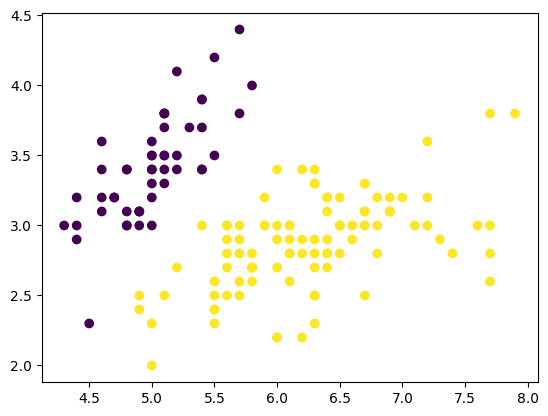

In [13]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y']) # scatter 是散点图

In [19]:
def sigmoid(z):
    # Sigmoid 分布函数
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    # 损失函数
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    # 梯度计算
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

In [21]:
# from sklearn.linear_model import  Logistic_Regression
import numpy as np
x = df[['X0', 'X1']].values
y = df['Y'].values
lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.05103697443193303, array([-1.47673791,  4.27250311, -6.9234085 ]))

Text(0, 0.5, 'Loss function')

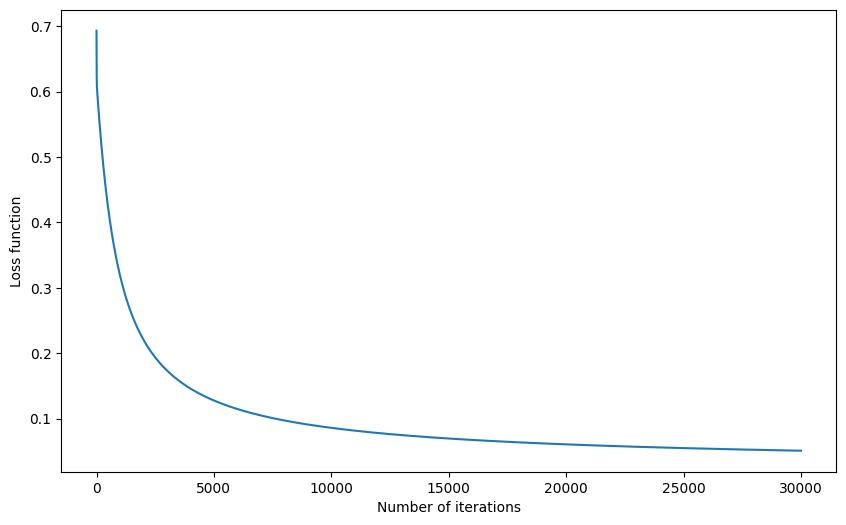

In [22]:
def Logistic_Regression_(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 1

    l_list = []  # 保存损失函数值
    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值
        l_list.append(l)

    return l_list


l_y = Logistic_Regression_(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

介绍其中几个常用的参数，其余使用默认即可：

penalty: 惩罚项，默认为 L2正则。
dual: 对偶化，默认为 False。
tol: 收敛阈值，当模型参数的更新量小于 tol 时，认为模型已经收敛，停止迭代（即使没有达到 max_iter），默认值为 0.0001。
fit_intercept: 默认为 True，计算截距项。
random_state: 随机数发生器。
max_iter: 最大迭代次数，默认为 100。

另外，solver 参数用于指定求解损失函数的方法。默认为 liblinear（0.22 开始默认为 lbfgs），适合于小数据集。除此之外，还有适合多分类问题的 newton-cg, sag, saga 和 lbfgs 求解器。这些方法都来自于一些学术论文，有兴趣可以自行搜索了解。

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=0.001, max_iter=10000, solver='liblinear')
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

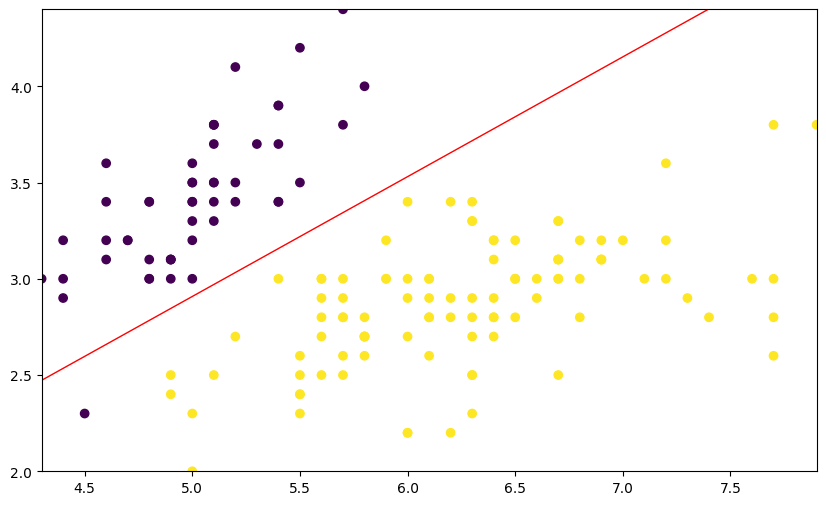

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max()
x2_min, x2_max = df['X1'].min(), df['X1'].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                       np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red')

In [25]:
# 看一下模型在训练集上的分类准确率：
model.score(x, y)  

0.9933333333333333